# Homework-1: 

**Author**: "J. Hickman"

Neural network training is essentially a multi-variable optimization of a scalar field 
$$y=f(\mathbf x)=f(x_1,x_2 ... x_N)$$

* The local or global minima or maxima of $y=f(\mathbf x)=f(x_1,x_2 ... x_N)$ satisfy the condition $\mathbf \nabla f(x) = 0$ where $\mathbf \nabla f(x)=(\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2} \dots \frac{\partial f}{\partial x_N})$ is the gradient, i.e. the vector of partial derivatives. 
* The most common form of numerical optimizers are "gradient based" methods. 
* Such methods  "follow" the gradient, i.e. the vector of partial derivatives, 'downhill' into local minima in the optimization space. 
* Therefore in this homework we focus on some fundamental concepts associated with numerical optimization, including numerical derivatives, solvers, and optimizers. 
* We then apply these tools to a simple regression example.

**Instructions** 

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook  
* **IMPORTANT**: Please render with `quarto render HW-1.ipynb` 
  * (please add `embed-resource: true` in the yaml header)
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc


# Part-0: Reading

Please read the following chapter in the course textbook if you have not done so already

![](images/reading.png)

# Part-1: Numerical math

* The point of this section is to 
  * (1) Get you familiar with a few numerical methods (e.g. numerical differentiation)
  * (2) `Sanity check` your functions with simple cases where we KNOW the answer beforehand.

**Mathematical paradigms** 

* When performing mathematics, we typically have two options, as demonstrated in the following image. 
* Often, it is preferable to take the "numerical" route. In this case we just let the computer do the work for us, rather than computing derivatives or integrals by hand with pen and paper.
* This is the route that will be typically be used in this course, however, during module-1 you will be expected to also do some pen and paper work. 

![](images/paradigms.png)


## Numerical Derivatives 

Given a function $y=f(x)$, we can compute a derivative, denoted $f'(x)$, with respect to it's independent variable $x$.

The derivative has the meaning of the instantaneous slope of the function at any point point $x$,  i.e. the slope of the tangent line. 

We can approximate the tangent line, via the secant line, using any two points on the curve. 

The closer the points are, i.e. the smaller $\Delta x$, the better the approximation.

This idea is summarized in the following image

![](images/derivative.png)

When functions in the computer are define on a "mesh" of dependent variable locations. 

E.g. if the function has time-dependence, the in-dependent variable becomes $t$ instead of $x$. 

Due to the finite precision (and memory) of a computer, we can only store functions as list, not continuous functions. As demonstrated in the following image

![](images/image-2.png)

Therefore, the secant line is a typical method for computing a derivative inside computers.

Approximating the derivative with the secant line is also known as the finite difference approximation of the derivative. 

Later in the course, we will discuss a more sophisticated and elegant method for computing the derivative, known as "back propagation". The back-propagation method is more commonly used in deep learning, however, finite differences are easier to understand educationally and are also an important computational tool in many algorithms. Therefore, we will start with finite differences before moving onto back-propagation.

There are several different finite-difference formulas for the first derivative of varying accuracy, as shown in the following image. 

For more see: [https://en.wikipedia.org/wiki/Finite_difference](https://en.wikipedia.org/wiki/Finite_difference)

**IMPORTANT:** This method can easily be generalized to compute the gradient (vector of partial derivatives) of multi-variable scalar field. 

![](images/image-3.png)

## Assignment-1

* Write a function `def dy_dx(x,y)` that takes two numpy arrays x,y where y=f(x)
  * Returns a vector, of same dimension as x and y, with the first derivative, computed using finite difference
  * For dy_dx[0] use forward difference 
  * for dy_dx[1:N-1] use central difference
  * for dy_dx[N] us backward difference 
  * Note this can be done with three lines in numpy, using a "vectorized" formalism, OR with a for-loop
* Test your function by plotting the derivative of $f(x)=x^3+x^2$ with both the numerical and analytic solution, where the derivative is $\frac{df}{dx}=3x^2+2x$
* **IMPORTANT**: In ANN training the we compute a different derivative $\frac{\partial L}{\partial w}$, where $L$ is the loss surface and $w$ are the model parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

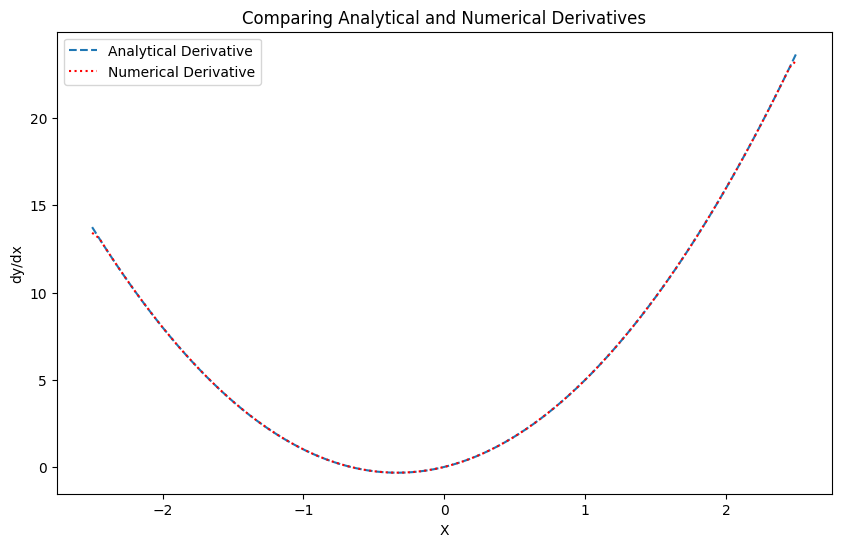

In [3]:
# INSERT CODE HERE

def dy_dx(x, y):
    """Calculate the derivative of y with respect to x using the finite difference.

    Args:
    x (numpy array): The x values.
    y (numpy array): The y values corresponding to f(x).

    Returns:
    numpy array: The derivatives of y with respect to x.
    """
    #create an array to store the derivatives
    dy = np.zeros_like(y)

    #using methods mentioned above for dy_dx[0], dy_dx[1:N-1], dy_dx[N-1]}
    #Forward the differences for the first point
    dy[0] = (y[1] - y[0]) / (x[1] - x[0])
    #get the central differences for the middle points
    dy[1:-1] = (y[2:] - y[:-2]) / (x[2:] - x[:-2])
    #backward diff for the last point
    dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
    return dy

#test functions and derivatives provided above
def f(x):
    return x**3 + x**2
def df_dx(x):
    return 3*x**2 + 2*x
x = np.linspace(-2.5, 2.5, 100)

#get vals for y 
y = f(x)
analytical_derivative = df_dx(x)

#get vals for numerical derivative
numerical_derivative = dy_dx(x, y)

plt.figure(figsize=(10, 6))
plt.plot(x, analytical_derivative, label='Analytical Derivative', linestyle='--')
plt.plot(x, numerical_derivative, label='Numerical Derivative', linestyle=':', color='r')
plt.title('Comparing Analytical and Numerical Derivatives')
plt.xlabel('X')
plt.ylabel('dy/dx')
plt.legend()
plt.show()


This method can easily be generalized to to compute the partial derivative terms of the gradient. 

In the following image h is the step size (i.e. $h=\Delta x$)

![](images/partial.png)


## Assignment-2

`Sanity check`

* The previous sub-assignment computed the derivate at each x-point, however, often we just need to compute the "local" derivative around one x point denoted x0
* Write a python function `def f(x)` which returns a multi-variable scalar field $y=f(\mathbf x)=f(x_1,x_2 ... x_N)$, an arbitrary input dimension N.
  * For simplicity, just use $y=f(\mathbf x)=f(x_1,x_2,x_3)=2.718 x_1^2+3.14 x_2+1.0 x_3+2$ 
  * compute the gradient of this function "by hand" to make sure your numerical implementation matches the analytical result
<br></br>
* Write a function `def grad(f,x0,dx)` that;
  * takes this f function as an input 
    * see the following link for information on passing a function as an argument to another function. 
    * [https://www.geeksforgeeks.org/passing-function-as-an-argument-in-python/](https://www.geeksforgeeks.org/passing-function-as-an-argument-in-python/)
  * Returns the gradient vector, as a numpy array, computed around the point x0 by using the multi-variable finite difference with a step size equal to dx.
* test the function by computing the gradient vector around $\mathbf x=(x_1,x_2,x_3)=(1,2,3)$

In [52]:
# INSERT YOUR CODE HERE
def f(x):
    return 2.718 * x[0]**2 + 3.14 * x[1] + 1.0 * x[2] + 2


def grad(f, x0, dx):
    gradients = np.zeros_like(x0)
    #iterate through the elements of x0
    for i in range(len(x0)):
        f_diff = []
        b_diff = []
        for val in x0:
            #append the value of x0 + dx to f_diff
            f_diff.append(x0[val-1] + dx)
            #append the value of x0 - dx to b_diff
            b_diff.append(x0[val-1] - dx)

        gradient = (f(f_diff) - f(b_diff)) / (2 * dx)
    return gradient



x0 = np.array([1, 2, 3])  #test
dx = .0001 #step size

print(f"---both methods returned the gradient as 9.576... with x0 = 1,2,3---\n\n")

#get the numerical gradient
grad_n = grad(f, x0, dx)

print("Numerical Gradient at x0 =", x0, ":", grad_n)

#gradient taken by hand, only 2.718 has an exponent, 3.14 and 1 remain, 2 doesnt have a variable x and is 0
grad_a = np.array([2.718 * 2 * x0[0] + 3.14 + 1.0])

print("Analytical Gradient at x0 =", x0, ":", grad_a)


---both methods returned the gradient as 9.576... with x0 = 1,2,3---


Numerical Gradient at x0 = [1 2 3] : 9.57600000000447
Analytical Gradient at x0 = [1 2 3] : [9.576]


In [ ]:
def compute_gradient(f, p, x, y, epsilon=1e-6):
    """Compute numerical gradient using central difference."""
    grad = np.zeros_like(p)
    for i in range(len(p)):
        p_plus = np.copy(p)
        p_minus = np.copy(p)
        p_plus[i] += epsilon
        p_minus[i] -= epsilon
        grad[i] = (f(x, p_plus, y) - f(x, p_minus, y)) / (2 * epsilon)
    return grad



# Part-3: Regression

## Assignment-3

`Code a multi-variable optimizer`  (feel free to recycle code if you have done this in other classes)

* The following sub-assignment is a copy of `Lab-1.1`, **however**, you will need to code the optimizer yourself, rather than using the Scipy optimizer.
* Copy the regression workflow from your COMPLETED lab-1.1 assignment 
* You MUST use the `dataset="5D_LINEAR"; model_type="linear"` dataset (but your code should work for any of them)
* Replace the SciPy optimizer with your own optimizer function
* Have the optimizer take the objective (loss) function as an argument, along with various default options 
  * `def optimizer(objective, algo=‘GD’, LR=0.001, method=‘batch’):`
* Code the optimizer so it can train using batch, mini-batch or stochastic paradigms
  * For minibatch use a 0.5 batch size
* Code the following optimizers for a general N-dimensional optimization problem (i.e don't hardcode for a specific dimensionality)
  * Gradient decent (GD) 
  * GD+momentum
  * RMSprop 
  * Nelder-Mead (optional extra credit +2.5 points)
  * For gradient based methods compute derivatives numerically using finite difference 
* `IMPORTANT:` Add a dense feed forward fully connected neural network option to your `m(x,p)` function 
  * code the ANN from scratch using numpy
  * choose the network size and activation function yourself, as appropriate for a regression problem
* Train on the dataset using both the ANN and the linear regression model
* Visualize the results for both linear and ANN cases
  * Report the loss value for training and validation sets
  * A `parity plot` where you plot `y_pred` vs `y_data` for both validation and training data (Note: the line y=x represents a perfect fit)
  * A "time-series plot" showing "training_error" and "validation_error" as a function of the ith iteration of the optimizer 

In [153]:
dataset="5D_LINEAR"
model_type="linear"

# DATA PARAM
N=2000
xmin=-10
xmax=10

if(dataset=="2D_LINEAR" or dataset=="2D_LOGISTIC"):
    #DEFINE A RANDOM INPUT MATRIX (X) ITH TWO FEATURES
    x=np.random.uniform(xmin,xmax,(N,2))
    #DEFINE RESPONSE VARIABLES Y USING A LINEAR RESPONSE
    noise=np.random.uniform(-1.5,1.5,(N,))
    y=1.4*x[:,0]+4.5*x[:,1]+5+noise
    y=y.reshape(N,1)
    if(dataset=="2D_LOGISTIC"):
      #I'm not sure this is necessary, but I added it because it seemed logical
      model_type="logistic"
      y=s(y)
elif(dataset=="5D_LINEAR"):
    #DEFINE A RANDOM INPUT MATRIX (X) ITH TWO FEATURES
    x=np.random.uniform(xmin,xmax,(N,5))
    #DEFINE RESPONSE VARIABLES Y USING A LINEAR RESPONSE
    noise=np.random.uniform(-0.5,0.5,(N,))
    y=1.4*x[:,0]+4.5*x[:,1]+3.5*x[:,2]+8.6*x[:,3]-1.5*x[:,4]+5+noise
    y=y.reshape(N,1)

In [154]:
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (2000, 5)
Shape of y: (2000, 1)


In [160]:
split_idx = int(N*.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training set shape: {x_train.shape, y_train.shape}")
print(f"Test set shape: {x_test.shape, y_test.shape}")

Training set shape: ((1600, 5), (1600, 1))
Test set shape: ((400, 5), (400, 1))


In [161]:
u_x = np.mean(x_train, axis=0)
sigma_x = np.std(x_train, axis=0)
if model_type == "linear":
    u_y = np.mean(y_train)
    sigma_y = np.std(y_train)
else:
    u_y = 0
    sigma_y = 1

x_train = (x_train - u_x) / sigma_x

x_val = (x_test - u_x) / sigma_x

if model_type == "linear":
    y_train = (y_train - u_y) / sigma_y
    y_val = (y_test - u_y) / sigma_y

In [188]:
def linear_model(x, p):
    """Linear regression model."""
    return np.dot(x, p[:-1]) + p[-1]

def ann_model(x, parameters):
    """Artificial Neural Network model with a single hidden layer."""
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = np.dot(x, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z2

def relu(Z):
    """ReLU activation function."""
    return np.maximum(0, Z)


In [189]:
def mse_loss(y_pred, y_true):
    """Mean Squared Error loss."""
    return np.mean((y_pred - y_true) ** 2)


In [190]:
def gradient_descent_update(p, grad, learning_rate):
    """Gradient Descent update that supports both vectors and dictionaries."""
    if isinstance(p, dict):
        updated_params = {}
        for key in p.keys():
            updated_params[key] = p[key] - learning_rate * grad[key]
        return updated_params
    else:  # Original vector update
        return p - learning_rate * grad


def gd_momentum_update(p, grad, learning_rate, v, momentum):
    """GD with Momentum update that supports both vectors and dictionaries."""
    if isinstance(p, dict):
        updated_params = {}
        updated_v = {}
        for key in p.keys():
            updated_v[key] = momentum * v[key] - learning_rate * grad[key]
            updated_params[key] = p[key] + updated_v[key]
        return updated_params, updated_v
    else:  # Original vector update
        v = momentum * v - learning_rate * grad
        return p + v, v


def rmsprop_update(p, grad, learning_rate, s, beta, epsilon):
    """RMSprop update."""
    s = beta * s + (1 - beta) * grad ** 2
    p -= learning_rate * grad / (np.sqrt(s) + epsilon)
    return p, s


In [191]:
def compute_gradient(f, p, x, y, epsilon=1e-6):
    grad = np.zeros_like(p)
    
    if isinstance(p, dict):  # Check if parameters are in a dictionary (for ANN)
        grad = {key: np.zeros_like(value) for key, value in p.items()}
        
        for key in p.keys():
            for index, _ in np.ndenumerate(p[key]):
                p_plus = {k: np.copy(v) for k, v in p.items()}
                p_minus = {k: np.copy(v) for k, v in p.items()}
                p_plus[key][index] += epsilon
                p_minus[key][index] -= epsilon
                grad[key][index] = (f(x, p_plus, y) - f(x, p_minus, y)) / (2 * epsilon)
    else:  # Handling vector parameters (for linear regression)
        for i in range(len(p)):
            p_plus = np.copy(p)
            p_minus = np.copy(p)
            p_plus[i] += epsilon
            p_minus[i] -= epsilon
            grad[i] = (f(x, p_plus, y) - f(x, p_minus, y)) / (2 * epsilon)

    return grad



In [192]:
def train_model(x_train, y_train, x_val, y_val, model, optimizer, params_init, epochs, learning_rate, algo='GD', momentum=0.9, beta=0.99, epsilon=1e-8):
    params = params_init
    v = np.zeros_like(params)  # For momentum
    s = np.zeros_like(params)  # For RMSprop

    for epoch in range(epochs):
        # Model predictions
        y_pred_train = model(x_train, params)
        y_pred_val = model(x_val, params)
        
        # Compute gradients
        grad = compute_gradient(lambda x, p, y: mse_loss(model(x, p), y), params, x_train, y_train)
        
        # Update parameters
        if algo == 'GD':
            params = gradient_descent_update(params, grad, learning_rate)
        elif algo == 'GD+momentum':
            params, v = gd_momentum_update(params, grad, learning_rate, v, momentum)
        elif algo == 'RMSprop':
            params, s = rmsprop_update(params, grad, learning_rate, s, beta, epsilon)
        
        # Optionally, compute and print loss every few epochs or implement early stopping
        
    return params

def m(x, p, model_type='linear'):
    if model_type == 'linear':
        return linear_model(x, p)
    elif model_type == 'ANN':
        # Ensure ANN model parameters are passed correctly
        return ann_model(x, p).flatten()  # Use flatten() if necessary to match y's shape
    else:
        raise ValueError("Invalid model type. Choose 'linear' or 'ANN'.")


In [193]:
import matplotlib.pyplot as plt

def plot_parity(y_pred, y_true, title='Parity Plot'):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.show()


In [194]:
def get_batches(x, y, batch_size):
    """Yield successive batches from x and y."""
    for start in range(0, len(x), batch_size):
        end = start + batch_size
        yield x[start:end], y[start:end]

def relu_derivative(Z):
    """Derivative of ReLU activation function."""
    return np.where(Z > 0, 1, 0)

def initialize_weights(input_dim, output_dim):
    """Initialize weights for a layer with given dimensions."""
    return np.random.randn(input_dim, output_dim) * 0.01

def initialize_bias(output_dim):
    """Initialize biases for a layer with given dimensions."""
    return np.zeros((1, output_dim))



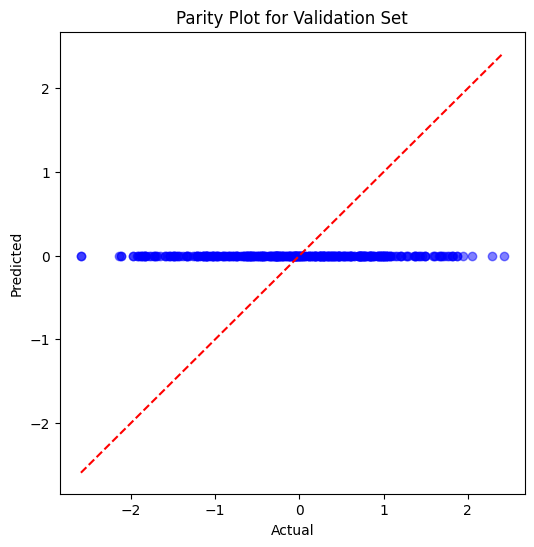

In [173]:
model_type = 'linear'  # Change to 'ANN' for neural network model
if model_type == 'linear':
    params_init = np.random.rand(x_train.shape[1] + 1)  # Linear model parameters
elif model_type == 'ANN':
    params_init = initialize_parameters(x_train.shape[1], 10, 1)  # ANN model parameters

# Training parameters
epochs = 1000
learning_rate = 0.01
algo = 'GD'  # Change to 'GD+momentum' or 'RMSprop' as needed

# Train the model
trained_params = train_model(x_train, y_train, x_val, y_val, lambda x, p: m(x, p, model_type), optimizer, params_init, epochs, learning_rate, algo=algo)

# Model predictions
y_pred_train = m(x_train, trained_params, model_type)
y_pred_val = m(x_val, trained_params, model_type)

# Parity plot for validation set
plot_parity(y_pred_val, y_val, title='Parity Plot for Validation Set')




In [195]:
model_type = 'ANN'  # Change to 'ANN' for neural network model
if model_type == 'linear':
    params_init = np.random.rand(x_train.shape[1] + 1)  # Linear model parameters
elif model_type == 'ANN':
    params_init = initialize_parameters(x_train.shape[1], 10, 1)  # ANN model parameters

# Training parameters
epochs = 1000
learning_rate = 0.01
algo = 'GD'  # Change to 'GD+momentum' or 'RMSprop' as needed

# Train the model with the modified optimizer
trained_params = train_model(x_train, y_train, x_val, y_val, lambda x, p: m(x, p, model_type), optimizer, params_init, epochs, learning_rate, algo=algo)

# Model predictions using the modified m function
y_pred_train = m(x_train, trained_params, model_type)
y_pred_val = m(x_val, trained_params, model_type)

# Parity plot for validation set using the provided plot_parity function
plot_parity(y_pred_val.flatten(), y_val.flatten(), title='Parity Plot for Validation Set')  # Flatten if necessary



# Part-4: Analytical


## Assignment-4

* Note: feel free to recycle solutions if you have done this in other classes
* Work through the following math problems relevant to deep learning (show your work and all steps)
* You can do this either by (1) doing the math inside `.ipynb` using LaTex (recommended) OR (2) doing it with pen and paper, taking photographs, and embedding the solutions into the `.ipynb` as images.  

![](images/2023-09-07-14-05-07.png)

## Assignment-5

* Linear least squares (LLS): `Single-variable`
- Use Calculus to analytically derive the expression for single variable linear regression fitting parameters using the sum of square error as the loss function (show your work).
- That is, do the mathematical optimization problem by hand rather than with a computer
$$
\begin{aligned}
& \text { Model: } y=M(x \mid \mathbf{p})=m x+b \,\,\,\, \mathbf{p}=\left(p_0, p_1\right)=(m, b) \\
& \text { Loss surface: } L(\mathbf{p})=L(m, b)=\sum_{i=1}^N\left(\hat{y}_i-M\left(\hat{x}_i, m, b\right)\right)^2 \\
&
\end{aligned}
$$



**Solution**:

$$
\begin{aligned}
& m=\frac{\operatorname{cov}(x, y)}{\operatorname{var}(x)} \quad \bar{x}=\frac{1}{N} \sum_{i=1}^N x_i \quad \operatorname{var}(X)=\frac{1}{N} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2 \\
& b=\bar{y}-\frac{\operatorname{cov}(x, y)}{\operatorname{var}(x)} \bar{x} \quad \bar{y}=\frac{1}{N} \sum_{i=1}^N y_i \quad \operatorname{cov}(X, Y)=\frac{1}{N} \sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right) \\
&
\end{aligned}
$$

## Assignment-6

* Linear least squares (LLS): `Multi-variable`
- Use matrix calculus to analytically derive the expression for two variable linear regression fitting parameters using the sum of square error as the loss function
- Show your work using matrix notation
- From your solution infer the generalized solution for an arbitrary number of variables 
- solution: $\quad \vec{w}=\left(X^{\top} X\right)^{-1} X^{\top} Y$.
